# UTS

In [3]:
import pandas as pd

## Read Dataset
#### Karena row pertama di dataset bukan nama column, melainkan langsung ke data pertama, maka kita akan menambahkan header untuk nama column

In [4]:
path = 'RegresiUTSTelkom.csv'
df = pd.read_csv(path, header=None)
num_cols = len(df.columns)
new_cols = ['target'] + ['x' + str(i) for i in range(1, num_cols)]
df.columns = new_cols


In [5]:
df

,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


## Cek data yang kosong

In [6]:
df.isnull().sum()


target    0
x1        0
x2        0
x3        0
x4        0
         ..
x86       0
x87       0
x88       0
x89       0
x90       0
Length: 91, dtype: int64

#### Sepertinya tidak ada data yang kosong, maka lanjut

### Train model sebelum preprocessing
#### Kita akan lakukan training model sebelum preprocessing agar ada perbandingan setelah preprocessing (baseline)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


RMSE: 8.956937789916992
R2: 0.325910747051239


In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.523312054048366
R2: 0.23796616215080735


R2 yang didapat ~0.325, kurang bagus. Model Linear Regression lebih buruk di 0.23

### Preprocessing: Seleksi Fitur

#### 1. Seleksi Multicolinearity
#### Kita akan menghilangkan fitur yang memiliki korelasi tinggi dengan fitur lain (selain target). Hal ini dilakukan karena jika dua fitur memiliki korelasi kuat (kuat negatif atau kuat positif), fitur tersebut mungkin sama atau mirip.

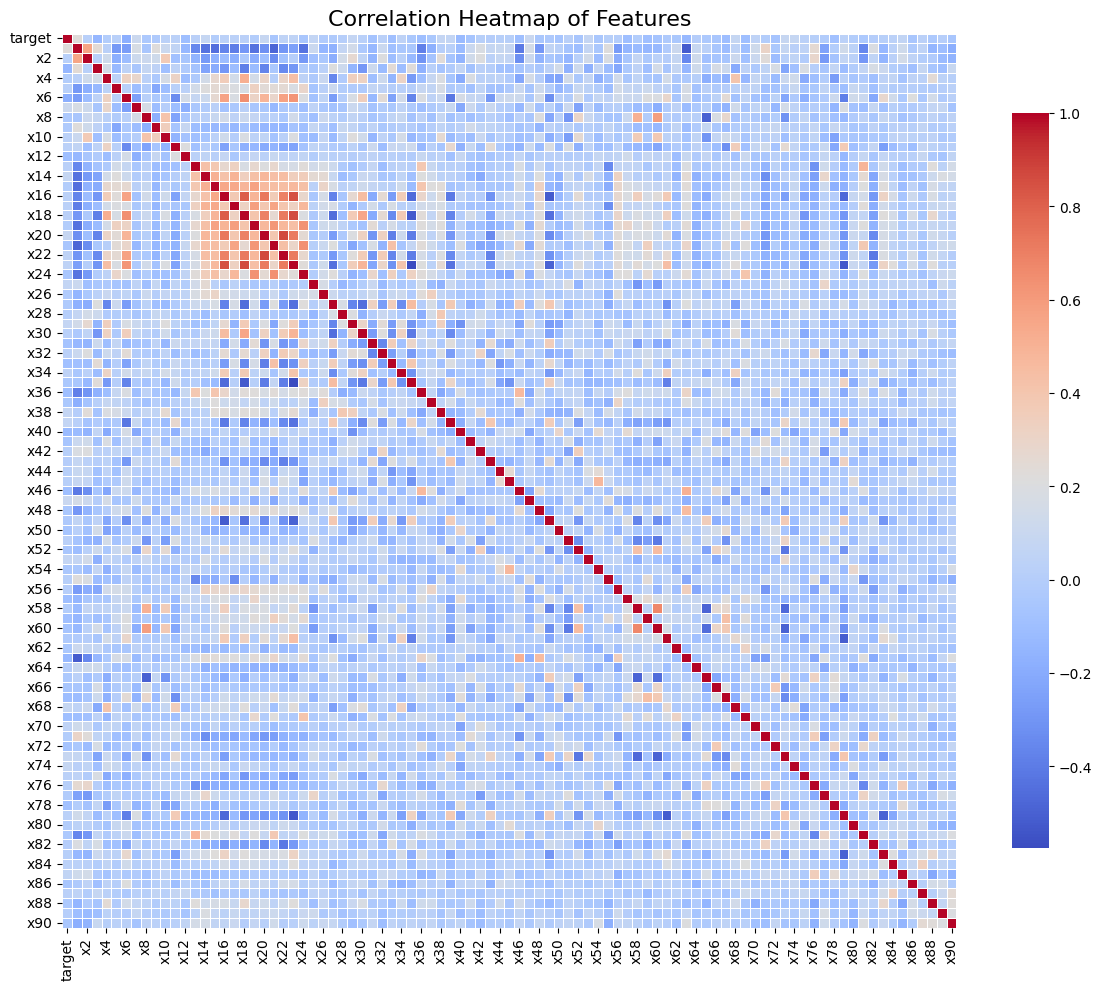

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Features', fontsize=16)

plt.tight_layout()

plt.show()


In [10]:
import numpy as np

In [11]:
df_1 = df.copy()

corr_matrix = df_1.corr()

mask = np.ones(corr_matrix.shape, dtype=bool)
np.fill_diagonal(mask, False) 
mask[:, 0] = False  
mask[0, :] = False

upper_threshold = 0.7
lower_threshold = -0.7
features_to_drop = []
correlation_values = {}
correlated_pairs = {}

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if mask[i, j] and (corr_matrix.iloc[i, j] > upper_threshold or corr_matrix.iloc[i, j] < lower_threshold):
        
            col_i = corr_matrix.columns[i]
            col_j = corr_matrix.columns[j]
            
            if col_i not in features_to_drop and col_j not in features_to_drop:
    
                if abs(corr_matrix[col_i]).mean() > abs(corr_matrix[col_j]).mean():
                    features_to_drop.append(col_i)
                    correlation_values[col_i] = corr_matrix.iloc[i, j]
                    correlated_pairs[col_i] = col_j
                else:
                    features_to_drop.append(col_j)
                    correlation_values[col_j] = corr_matrix.iloc[i, j]
                    correlated_pairs[col_j] = col_i

df_1 = df_1.drop(columns=features_to_drop)
print(f"Dropped {len(features_to_drop)} features due to high correlation")
print(f"Remaining features: {df_1.shape[1]}")

print("\nDropped features and their correlation values:")
for feature, corr_value in correlation_values.items():
    print(f"- {feature}: {corr_value:.4f} (highly correlated with {correlated_pairs[feature]})")


Dropped 4 features due to high correlation
Remaining features: 87

Dropped features and their correlation values:
- x16: 0.8096 (highly correlated with x18)
- x18: 0.7170 (highly correlated with x22)
- x20: 0.8657 (highly correlated with x22)
- x23: 0.7168 (highly correlated with x22)


Disini kita menghilangkan 4 fitur karena korelasi yang kuat dengan fitur lain.

Kita akan coba train model lagi dengan data baru

In [12]:
X = df_1.drop(columns=['target'])
y = df_1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 8.984336853027344
R2: 0.3217804431915283


In [13]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.555206054765849
R2: 0.23285344385631512


Sepertinya setelah proses seleksi multicolinearity, hasil semakin buruk di kedua model, maka kita akan coba teknik lain.

#### 2. ANOVA

In [14]:
from sklearn.feature_selection import f_regression, SelectKBest

X_anova = df.drop(columns=['target'])
y_anova = df['target']

selector = SelectKBest(score_func=f_regression, k=30)
X_new = selector.fit_transform(X_anova, y_anova)

selected_indices = selector.get_support(indices=True)
selected_features = X_anova.columns[selected_indices].tolist()
feature_scores = selector.scores_

df_2 = df[selected_features + ['target']]

print(f"Selected {len(selected_features)} top features using ANOVA")
print("Selected features with scores:")
for i, feature in enumerate(selected_features):
    print(f"- {feature}: {feature_scores[selected_indices[i]]:.5f}")

print(f"\nShape of new dataframe: {df_2.shape}")


Selected 30 top features using ANOVA
Selected features with scores:
- x1: 27576.64156
- x3: 10233.85535
- x6: 18765.88361
- x7: 6365.56168
- x12: 4911.61130
- x14: 3211.75254
- x20: 3935.55147
- x25: 2167.20727
- x29: 2785.89896
- x31: 2831.99197
- x33: 4320.95242
- x36: 5311.89122
- x38: 2870.32079
- x39: 2562.42736
- x40: 8044.28405
- x46: 5345.72410
- x47: 4802.46563
- x50: 2048.66294
- x53: 2841.53959
- x57: 4892.19966
- x59: 4471.44488
- x60: 2335.24396
- x63: 8360.35930
- x67: 5508.67734
- x68: 3432.44012
- x69: 5151.33555
- x72: 2413.29775
- x73: 3640.57844
- x74: 3467.08194
- x78: 3965.57353

Shape of new dataframe: (515345, 31)


Kita akan coba training lagi dengan data baru

In [15]:
X = df_2.drop(columns=['target'])
y = df_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.350957870483398
R2: 0.2652992606163025


In [16]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.933622408689345
R2: 0.17088738774652723


Hasil semakin buruk, kita akan coba teknik lain

#### 3. Feature Importance (dari XGB)

In [17]:
X = df.drop(columns=['target'])
y = df['target']

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X, y)

feature_importances = xgb_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})
importance_df = importance_df.sort_values('importance', ascending=False)

top_features = importance_df.head(30)['feature'].tolist()

df_3 = df[top_features + ['target']]


In [18]:
X = df_3.drop(columns=['target'])
y = df_3['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.06666374206543
R2: 0.3092939257621765


In [19]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.655287094051346
R2: 0.2166991288886827


Hasil lebih baik dibanding ANOVA, namun masih lebih buruk dibanding tidak melakukan seleksi fitur sama sekali. 

### Preprocessing: Transformasi Fitur

#### Transformasi Yeo-Johnson kita gunakan untuk mengurangi skewness pada persebaran data. Robust Scaling kita gunakan untuk menghandal outlier.

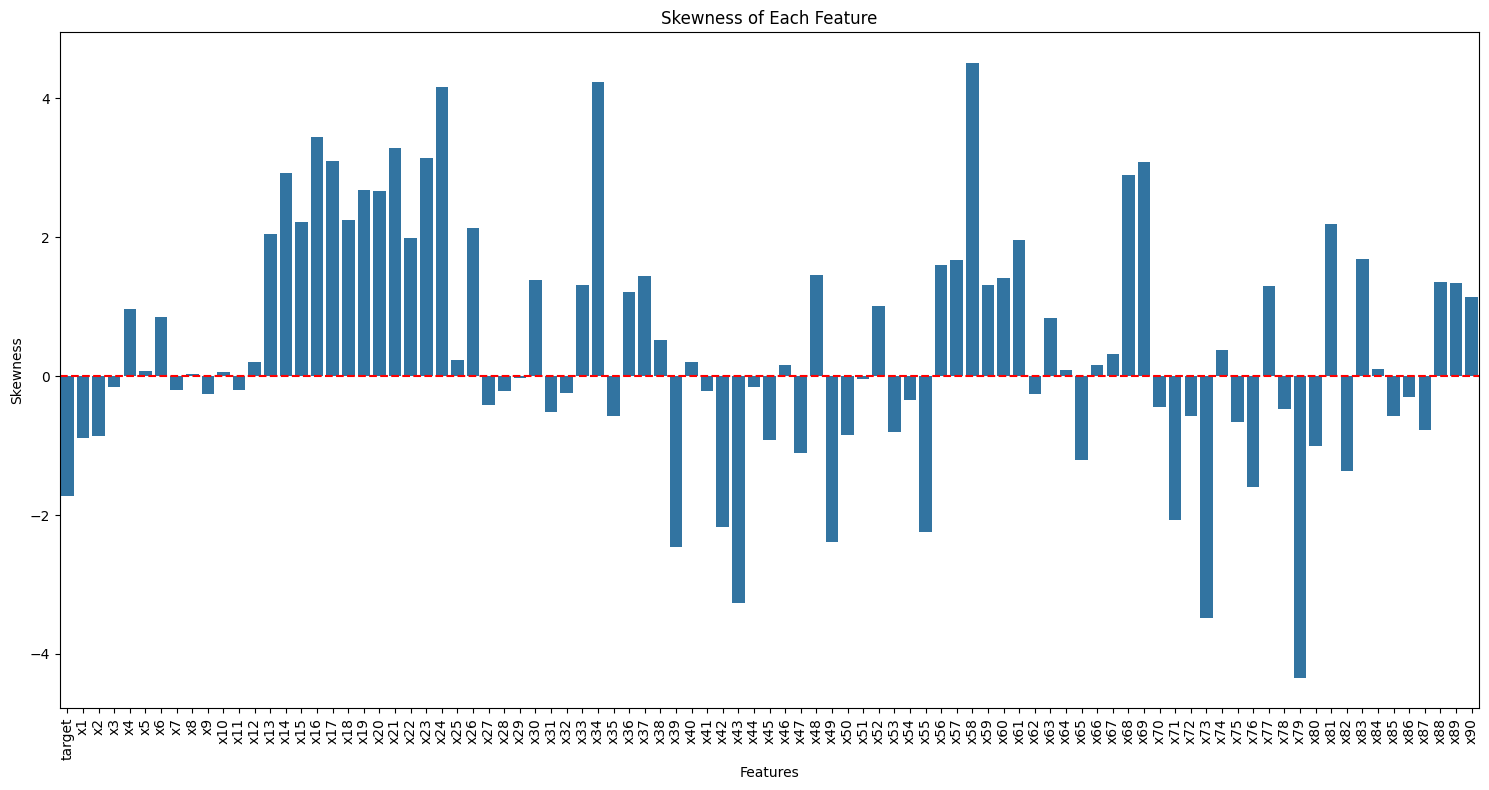

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

skewness = df.skew()

plt.figure(figsize=(15, 8))

sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Each Feature')

plt.tight_layout()
plt.show()


Fitur banyak yang skew, baik arah positif maupun negatif. Oleh karena itu kita transformasi menggunakan Yeo-Johnson yang dapat menghandal skew negatif dan positif.

In [21]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

preprocessor = Pipeline([
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('robust_scaler', RobustScaler())
])

features = df.drop('target', axis=1).columns
preprocessor_transformer = ColumnTransformer(
    [('preprocessor', preprocessor, features)],
    remainder='passthrough'
)

transformed_data = preprocessor_transformer.fit_transform(df)

df_4 = pd.DataFrame(
    transformed_data,
    columns=list(features) + ['target']
)

cols = df_4.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_4 = df_4[cols]


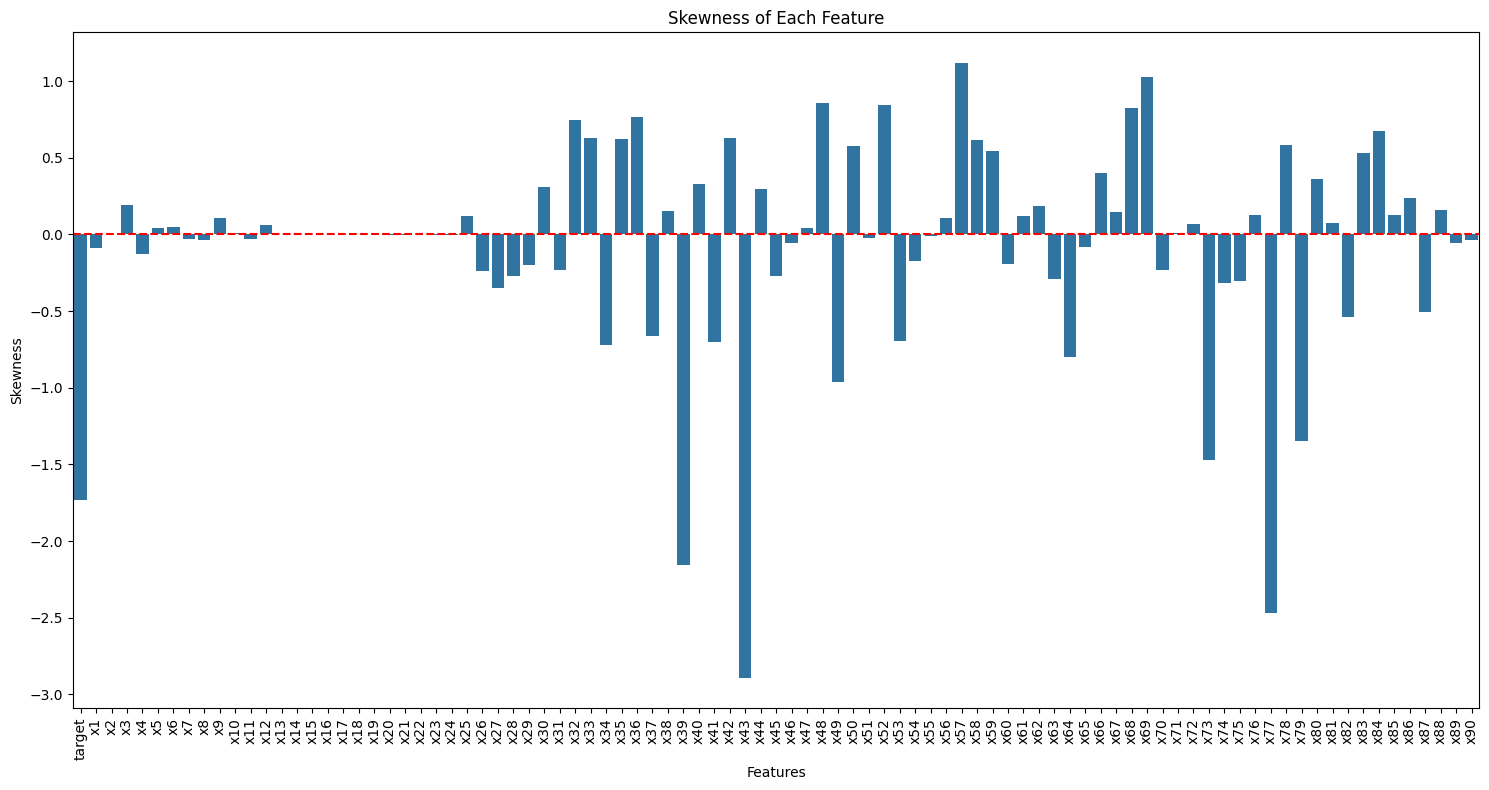

In [22]:
skewness = df_4.skew()

plt.figure(figsize=(15, 8))

sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Each Feature')

plt.tight_layout()
plt.show()

Setelah transformasi, data skew lebih sedikit, dari ada yang nilai skewnya 4, menjadi sebagian besar nilai skewnya dibawah 1.

Kita akan coba train model lagi setelah transformasi.

In [23]:
X = df_4.drop(columns=['target'])
y = df_4['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = root_mean_squared_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 8.956940409802582
R2: 0.32591044826672744


In [24]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = root_mean_squared_error(y_test, linreg_pred)
r2 = r2_score(y_test, linreg_pred)
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 9.495338271599984
R2: 0.2424363843674332


### Evaluasi Model Setelah Transformasi

Hasil transformasi menunjukkan sedikit peningkatan performa model:

#### Sebelum transformasi:
- **XGBoost**:
  - RMSE: 8.956937789916992
  - R²: 0.325910747051239
- **Linear Regression**:
  - RMSE: 9.523312054048366
  - R²: 0.23796616215080735

#### Setelah transformasi:
- **XGBoost**:
  - RMSE: 8.956940409802582
  - R²: 0.32591044826672744
- **Linear Regression**:
  - RMSE: 9.495338271599984
  - R²: 0.2424363843674332

Transformasi memberikan peningkatan kecil pada model Linear Regression, sementara XGBoost relatif tidak berubah.

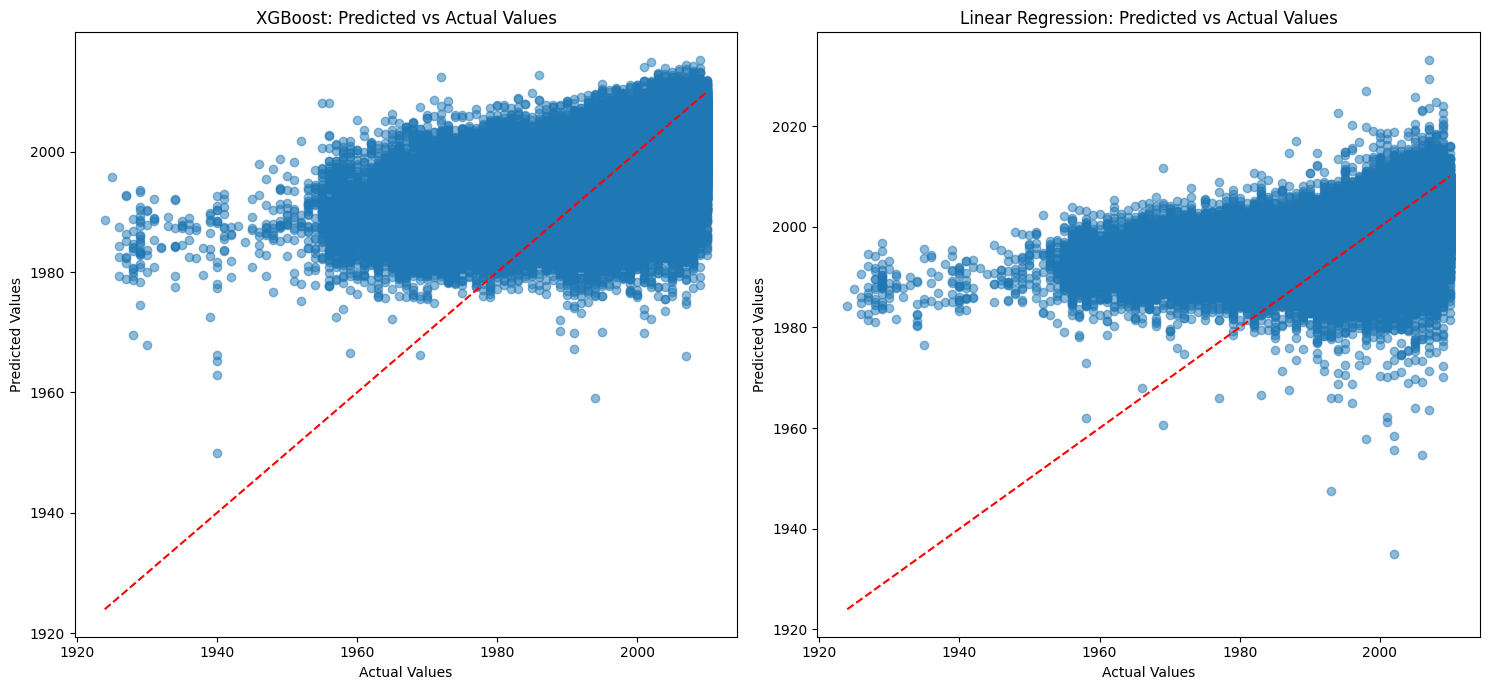

In [27]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Predicted vs Actual Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, linreg_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs Actual Values')

plt.tight_layout()
plt.show()


### Training model lain (KNN, Decision Tree, SVR, AdaBoost) sesuai parameter yang didapatkan dari GridSearch (di notebook training)

KNN (n_neighbors=1) Results:
RMSE: 9.420845376592247
R²: 0.25427624526936254


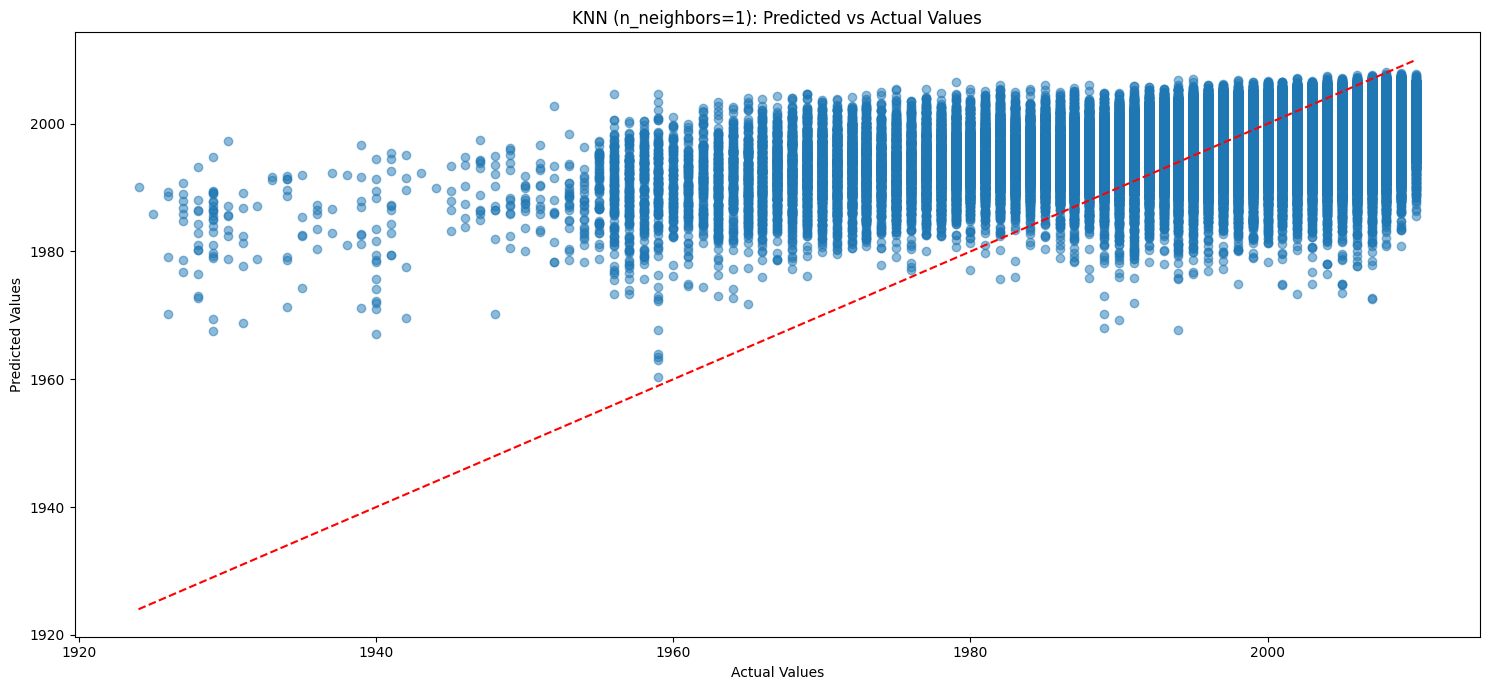

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=25)

knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

print("KNN (n_neighbors=1) Results:")
print(f"RMSE: {knn_rmse}")
print(f"R²: {knn_r2}")

plt.figure(figsize=(15, 7))
plt.scatter(y_test, knn_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN (n_neighbors=25): Predicted vs Actual Values')
plt.tight_layout()
plt.show()


Decision Tree (max_depth=5) Results:
RMSE: 10.000167878973173
R²: 0.1597417067321114


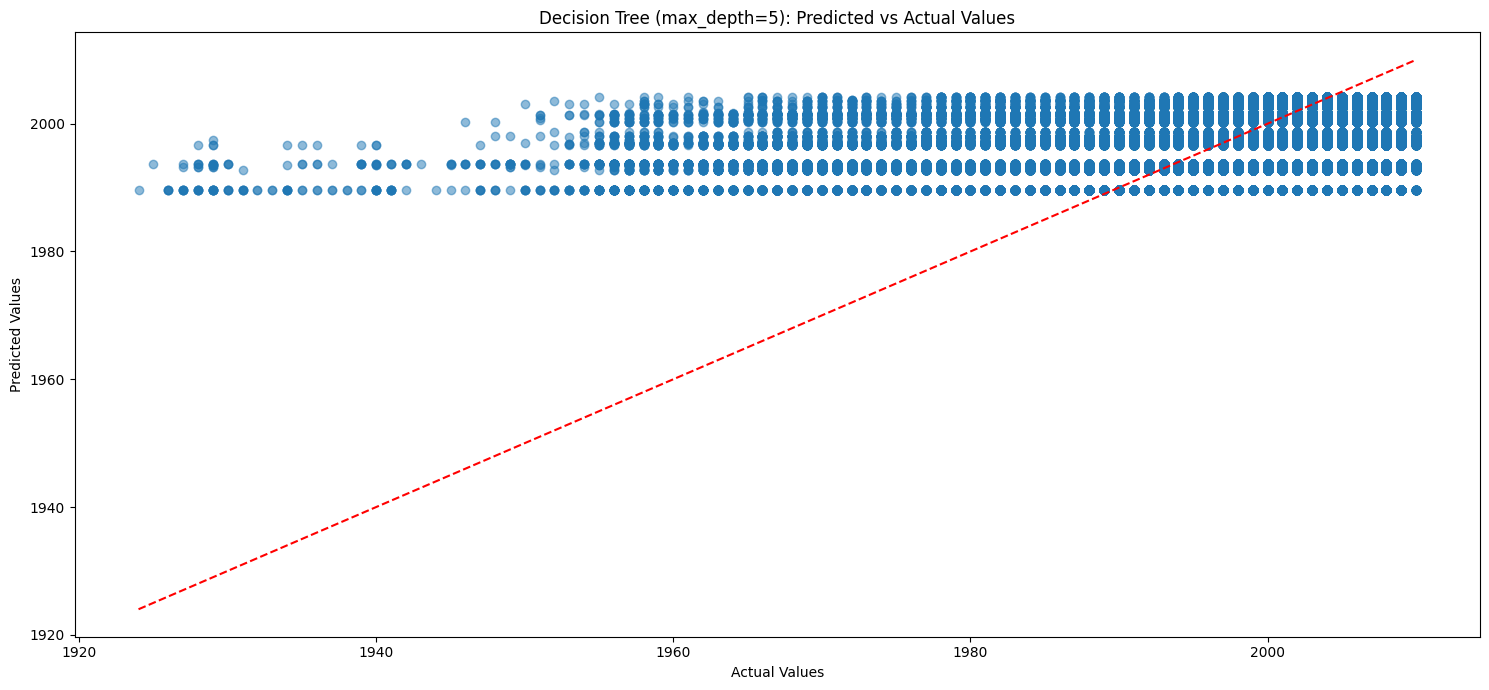

In [32]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree (max_depth=5) Results:")
print(f"RMSE: {dt_rmse}")
print(f"R²: {dt_r2}")

plt.figure(figsize=(15, 7))
plt.scatter(y_test, dt_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree (max_depth=5): Predicted vs Actual Values')
plt.tight_layout()
plt.show()


## Kesimpulan Evaluasi Model

Setelah melakukan berbagai eksperimen dengan beberapa model regresi, berikut adalah ringkasan performa model:

#### Perbandingan Model:
- **XGBoost**:
  - RMSE: 8.956940409802582
  - R²: 0.32591044826672744
  - *Performa terbaik* di antara semua model yang diuji

- **Linear Regression**:
  - RMSE: 9.495338271599984
  - R²: 0.2424363843674332
  - Menunjukkan peningkatan setelah transformasi data

- **KNN (n_neighbors=25)**:
  - RMSE: 9.420845376592247
  - R²: 0.25427624526936254
  - Performa menengah, sedikit lebih baik dari Linear Regression

- **Decision Tree (max_depth=5)**:
  - RMSE: 10.000167878973173
  - R²: 0.1597417067321114
  - Performa terendah di antara model yang diuji

#### Temuan Utama:
1. XGBoost konsisten memberikan hasil terbaik dengan RMSE terendah dan R² tertinggi
2. Transformasi data memberikan peningkatan pada model Linear Regression namun tidak signifikan pada XGBoost
3. Semua model menunjukkan R² yang relatif rendah (< 0.33), mengindikasikan bahwa fitur-fitur yang ada belum sepenuhnya menjelaskan variasi target
4. Model berbasis ensemble (XGBoost) mengungguli model tradisional dalam kasus ini

## Metrik Evaluasi Model Regresi

Dalam analisis regresi, beberapa metrik evaluasi utama yang digunakan adalah:

### 1. Mean Squared Error (MSE)
- **Definisi**: Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual
- **Rumus**: MSE = (1/n) * Σ(y_aktual - y_prediksi)²
- **Karakteristik**: 
  - Selalu positif, nilai yang lebih rendah menunjukkan performa yang lebih baik
  - Memberikan bobot lebih pada error yang besar karena dikuadratkan
- **Use Case**: 
  - Berguna ketika outlier atau error besar perlu diberi perhatian khusus
  - Sering digunakan sebagai fungsi loss dalam optimasi model

### 2. Root Mean Squared Error (RMSE)
- **Definisi**: Akar kuadrat dari MSE
- **Rumus**: RMSE = √MSE
- **Karakteristik**:
  - Memiliki satuan yang sama dengan variabel target
  - Lebih mudah diinterpretasikan dibandingkan MSE
- **Use Case**:
  - Ideal untuk mengukur akurasi prediksi dalam satuan yang sama dengan data asli
  - Populer dalam evaluasi model prediksi harga, suhu, atau nilai numerik lainnya

### 3. Coefficient of Determination (R²)
- **Definisi**: Proporsi variasi dalam variabel dependen yang dapat dijelaskan oleh variabel independen
- **Rumus**: R² = 1 - (SSres/SStot), di mana SSres adalah jumlah kuadrat residual dan SStot adalah jumlah kuadrat total
- **Karakteristik**:
  - Bernilai antara 0 dan 1 (atau negatif untuk model yang sangat buruk)
  - R² = 1 berarti model menjelaskan semua variabilitas data
  - R² = 0 berarti model tidak menjelaskan variabilitas data sama sekali
- **Use Case**:
  - Mengukur seberapa baik model menjelaskan variasi dalam data
  - Membantu membandingkan performa relatif antar model
  - Berguna untuk komunikasi hasil kepada non-spesialis

### Metrik Terbaik

Ketika kita mendapatkan nilai R² yang rendah (seperti dalam kasus kita dengan R² < 0.33):

- **RMSE lebih diutamakan** karena:
  - Memberikan ukuran absolut dari error prediksi dalam satuan yang sama dengan variabel target
  - Memungkinkan evaluasi praktis dari seberapa jauh prediksi dari nilai aktual
  - Tidak terpengaruh oleh keterbatasan R² dalam menjelaskan variasi data

Dalam kasus dengan R² rendah, fokus pada meminimalkan RMSE dan menginterpretasikan error dalam konteks domain masalah sering kali lebih bermanfaat daripada hanya mengejar peningkatan R².



# Algoritma Regresi yang Digunakan

### 1. Linear Regression
- **Definisi**: Model yang memprediksi variabel target sebagai kombinasi linear dari fitur input
- **Formula**: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
  - y adalah variabel target
  - β₀ adalah intercept
  - β₁, β₂, ..., βₙ adalah koefisien regresi
  - x₁, x₂, ..., xₙ adalah fitur input
  - ε adalah error term
- **Karakteristik**:
  - Sederhana dan mudah diinterpretasikan
  - Berasumsi hubungan linear antara fitur dan target
  - Rentan terhadap outlier
- **Use Case**: Cocok untuk data dengan hubungan linear yang jelas dan dataset yang tidak terlalu kompleks

### 2. Decision Tree Regressor
- **Definisi**: Model berbasis pohon yang membagi data menjadi subset berdasarkan nilai fitur
- **Formula**: Prediksi = rata-rata nilai target dalam leaf node
  - Untuk setiap node: Split = argmin[Σ(y_left - mean_left)² + Σ(y_right - mean_right)²]
  - MSE digunakan sebagai kriteria split: MSE = (1/n)Σ(y_i - ȳ)²
- **Karakteristik**:
  - Dapat menangkap hubungan non-linear
  - Mudah divisualisasikan dan diinterpretasikan
  - Rentan terhadap overfitting jika tidak dibatasi kedalaman pohon
- **Use Case**: Baik untuk data dengan hubungan kompleks dan non-linear

### 3. K-Nearest Neighbors (KNN) Regressor
- **Definisi**: Memprediksi nilai target berdasarkan rata-rata nilai dari k tetangga terdekat
- **Formula**: ŷ = (1/k)Σyᵢ untuk i ∈ Nₓ
  - ŷ adalah nilai prediksi
  - Nₓ adalah set k tetangga terdekat dari titik x
  - Jarak biasanya dihitung dengan Euclidean distance: d(x,y) = √Σ(xᵢ-yᵢ)²
- **Karakteristik**:
  - Model non-parametrik yang tidak membuat asumsi tentang distribusi data
  - Sensitif terhadap skala fitur
  - Komputasi berat untuk dataset besar
- **Use Case**: Efektif untuk dataset kecil hingga menengah dengan pola lokal yang kuat

### 4. XGBoost Regressor
- **Definisi**: Implementasi gradient boosting yang mengoptimalkan ensemble dari model lemah (biasanya decision tree)
- **Formula**: ŷᵢ = Σfₖ(xᵢ), fₖ ∈ F
  - F adalah ruang semua pohon regresi
  - Objective function: L = Σl(yᵢ, ŷᵢ) + ΣΩ(fₖ)
  - l adalah fungsi loss (biasanya MSE)
  - Ω adalah term regularisasi
- **Karakteristik**:
  - Performa tinggi dengan regularisasi bawaan
  - Menangani berbagai tipe data dan hubungan kompleks
  - Efisien secara komputasi dan dapat diparalelkan
- **Use Case**: Sangat baik untuk kompetisi dan aplikasi dunia nyata yang membutuhkan akurasi tinggi
